# CONTENT

1. [Introduction](#introduction)
   - [The Problem](#the-problem)
   - [The Goal](#the-goal)
   - [Objectives](#objectives)
2. [Import Libraries and Data](#import-libraries-and-data)
3. [EDA (Exploratory Data Analysis)](#eda-exploratory-data-analysis)
   - [Data exploration](#data-exploration)
   - [Data visualization](#data-visualization)
4. [Feature Engineering](#feature-engineering)
   - [Feature scaling](#feature-scaling)
   - [Data resampling](#data-resampling)
5. [Model Development](#model-Development)
6. [Hyperparameter tuning](#Hyperparameter-tuning)
7. [Conclusions](#conclusions)
   - [Results comparison](#Results-comparison)
   - [Best Model choice](#Best-model-choice)
   - [Recommendations](#Recommendations)

# 1. INTRODUCTION
 
  ### Problem Statement
The problem of credit card fraud presents significant challenges for financial institutions, businesses, and consumers worldwide. Fraudulent transactions lead to substantial financial losses, costing billions of dollars annually, and impose significant operational burdens on financial institutions, which must invest heavily in fraud detection and prevention measures
    
### The goal 
The goal of this project is to develop 3 Machine learning models capable of predicting credit card fraud. The ultimate objective is to create an accurate and reliable system that can identify potentially fraudulent transactions, thereby assisting financial institutions and businesses in preventing or mitigating losses caused by fraudulent activities.

  ### Objectives
* The following are the objectives of this project
* Explore and understand the data
* Preprocess the data
* Build three machine learning algorithms namely: decision tree, k-nearest neighbors, random forest to determine their efficiency in predicting credit card fraud scenarios
* Evaluate model performance and analyze the predictive accuracy of generalizability of the models.
  

### Importing the datasets and libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

import scipy.stats as stat
import pylab 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [24]:
credit_data = pd.read_csv("creditcard.csv")

In [3]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Univariate Statistics

In [4]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# EXPLORATORY DATA ANALYSIS

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


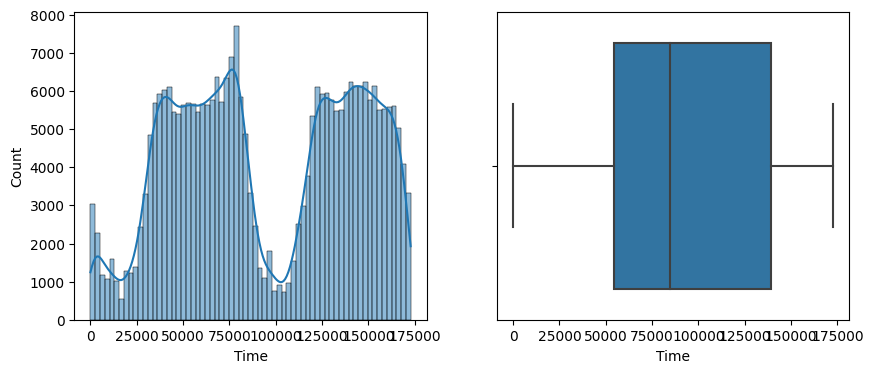

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


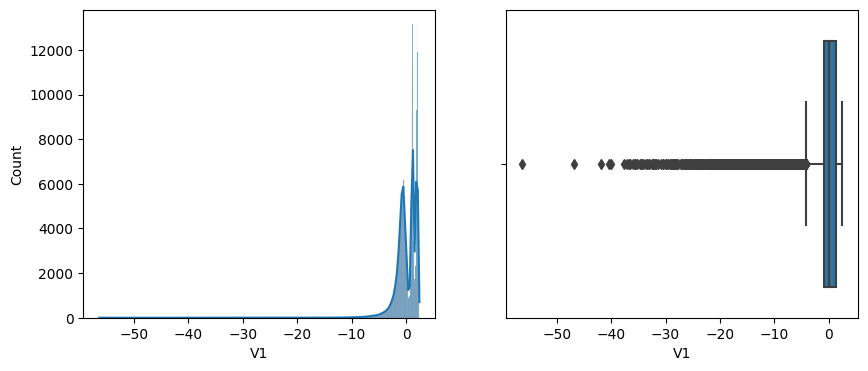

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


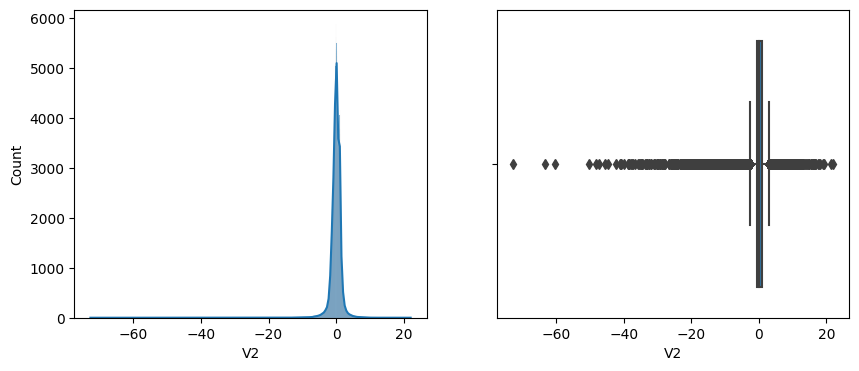

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


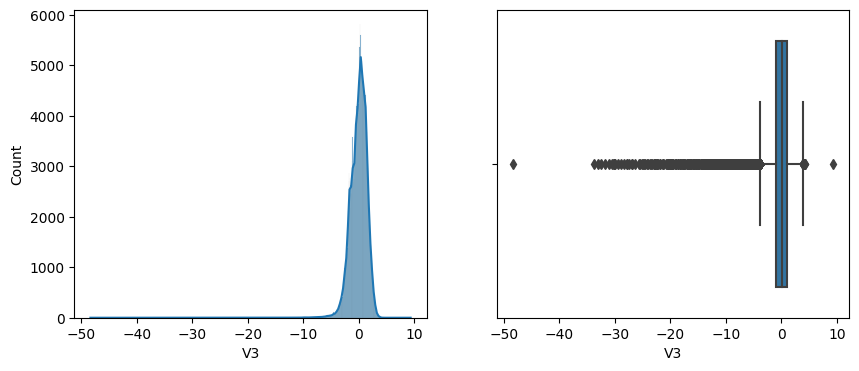

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


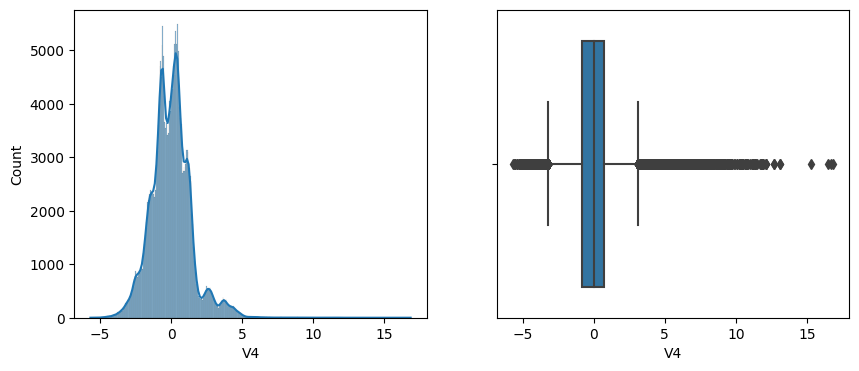

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


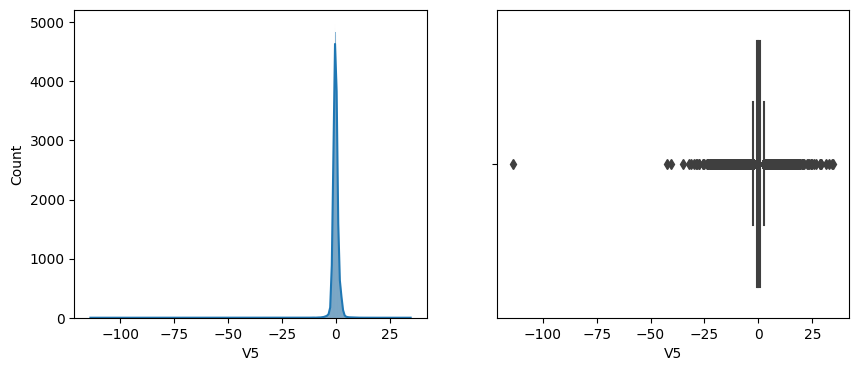

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


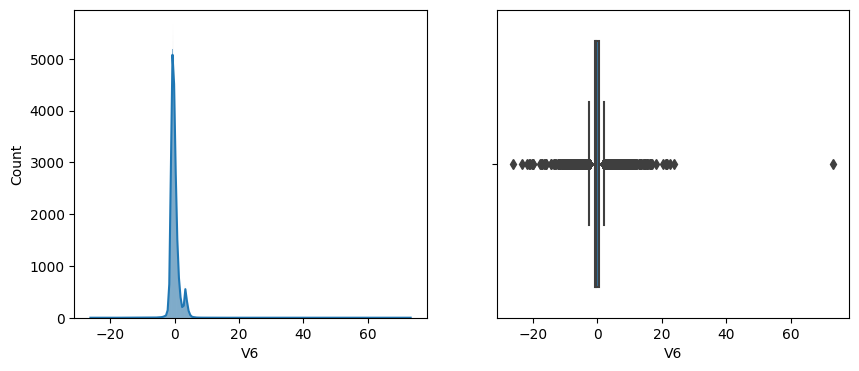

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


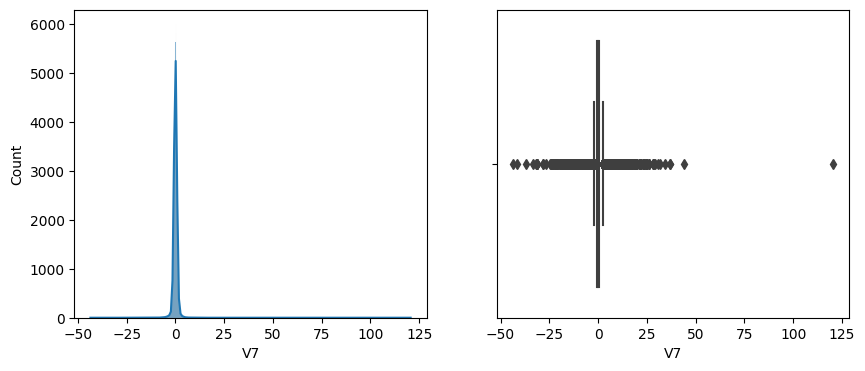

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


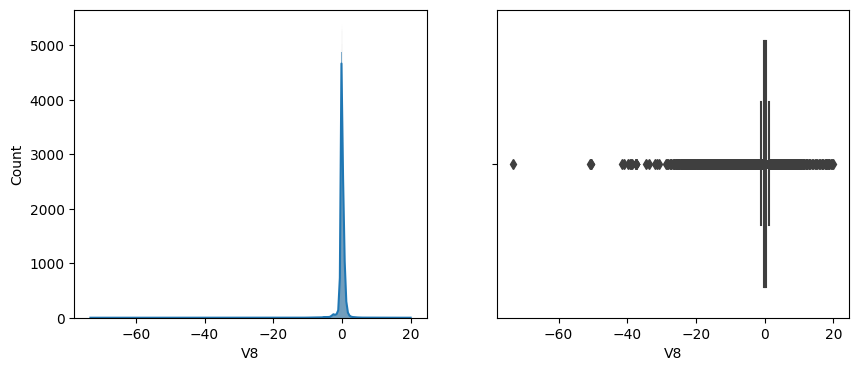

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


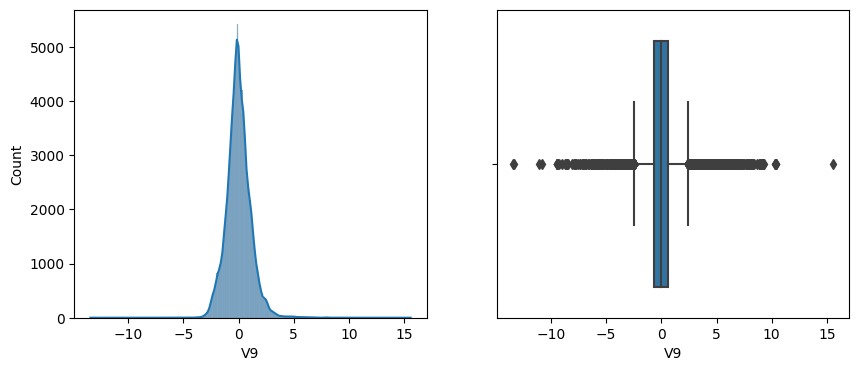

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


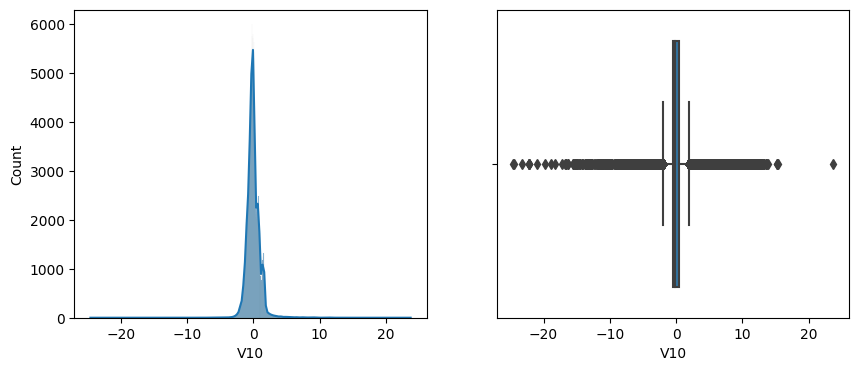

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


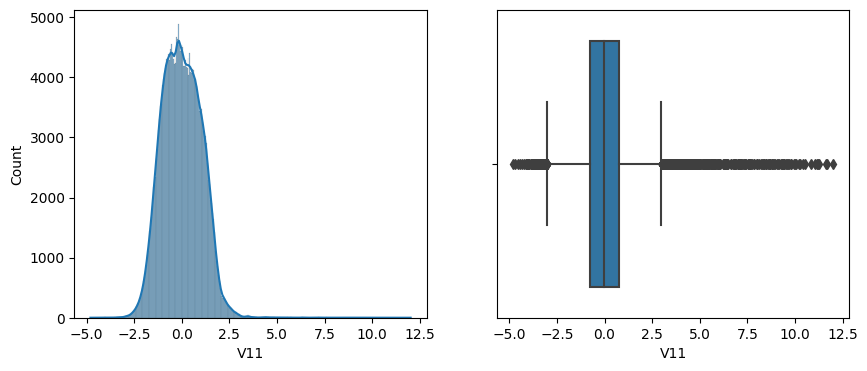

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


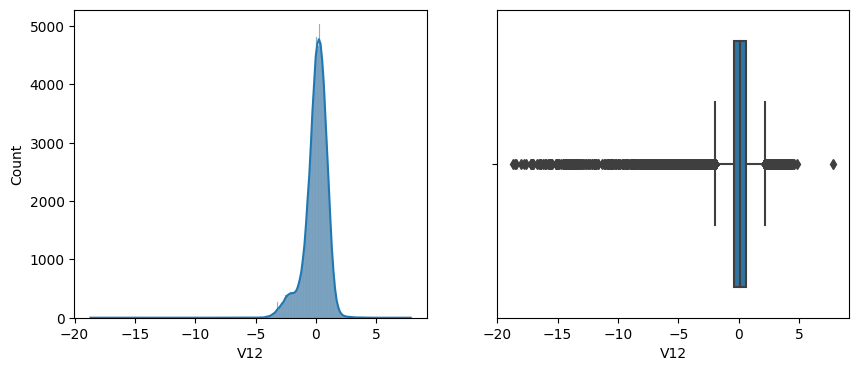

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


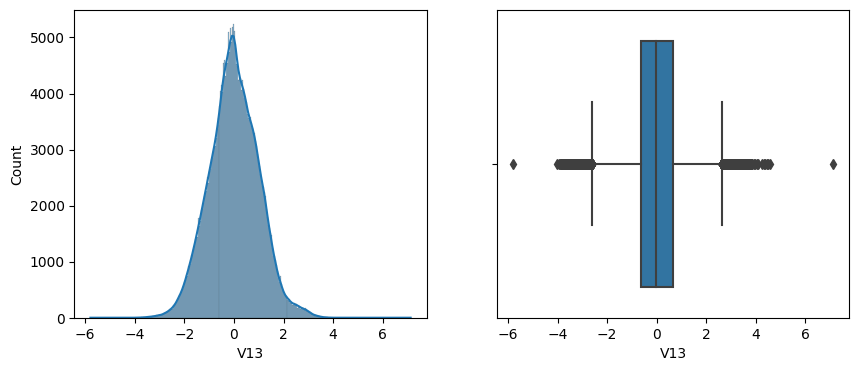

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


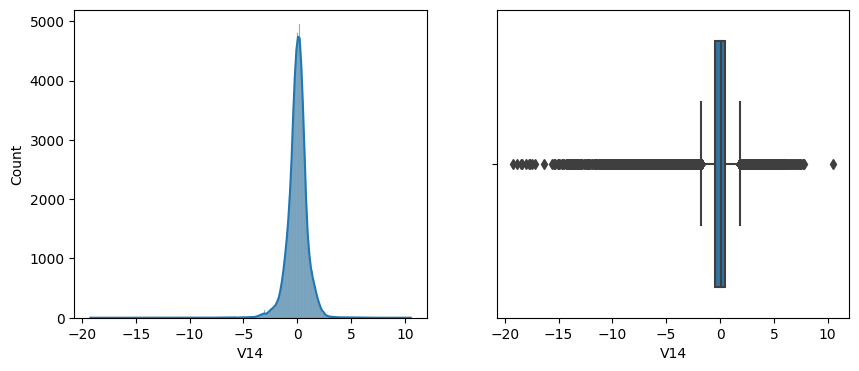

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


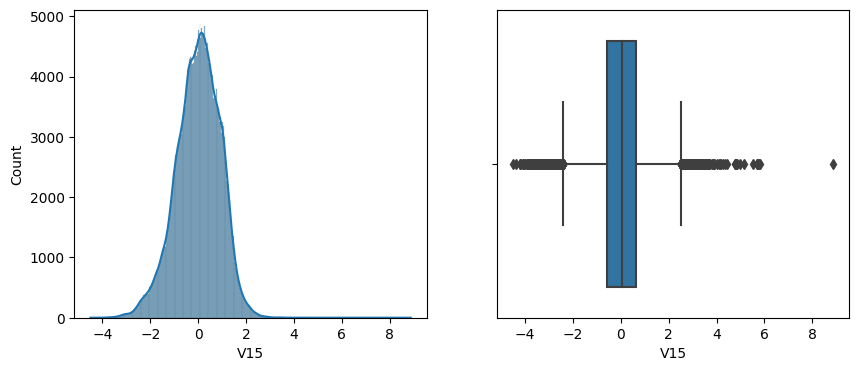

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


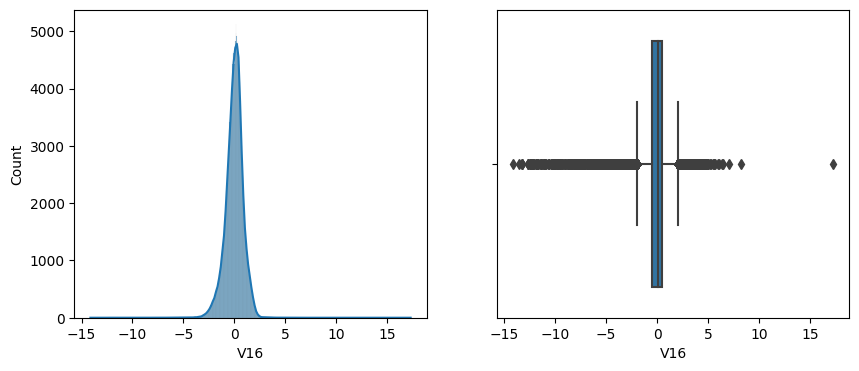

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


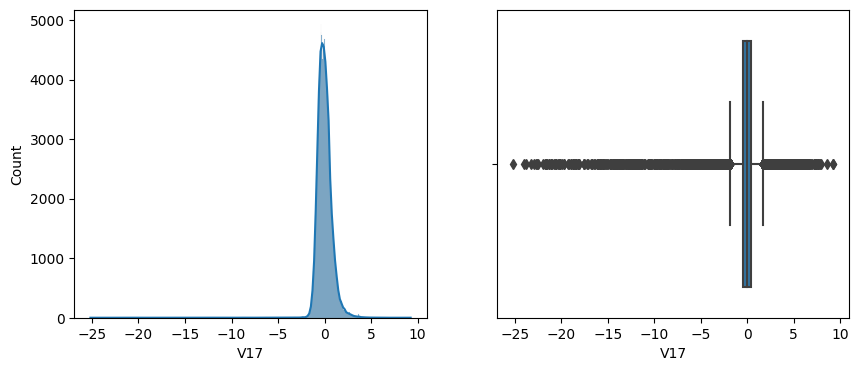

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


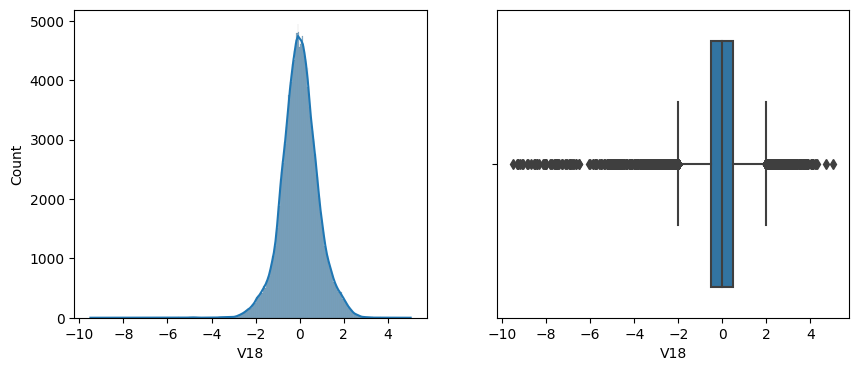

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


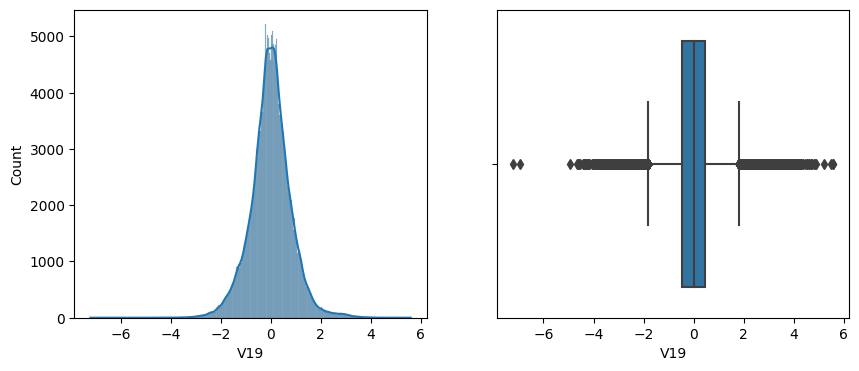

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


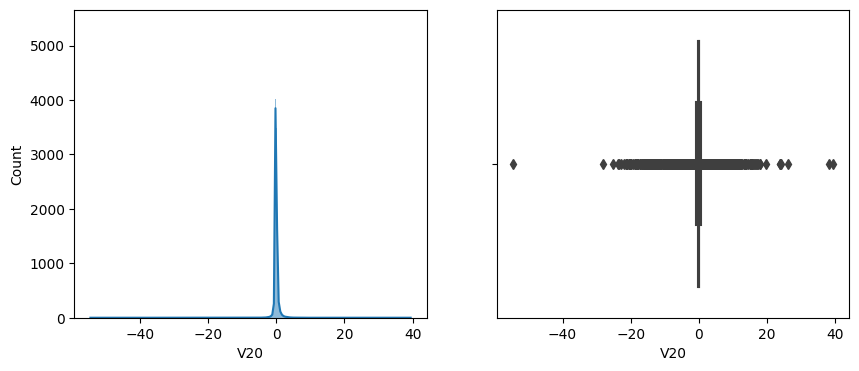

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


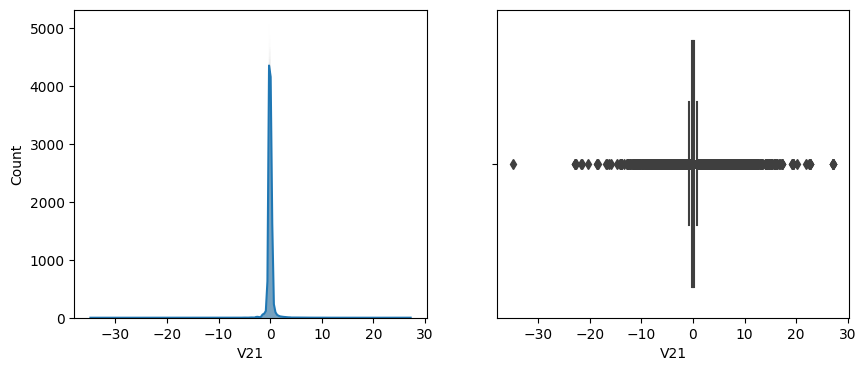

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


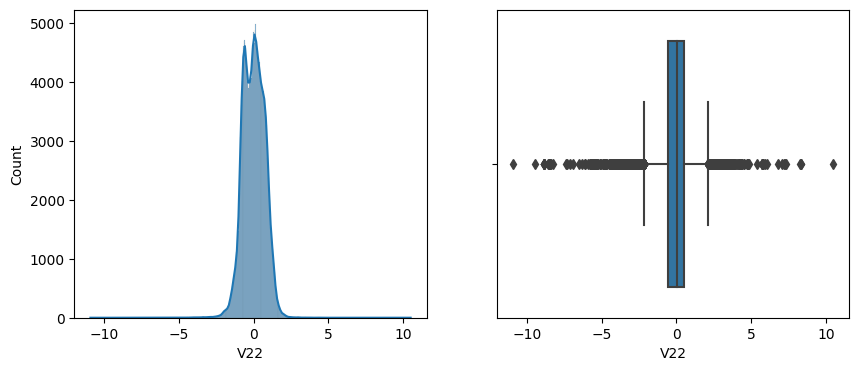

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


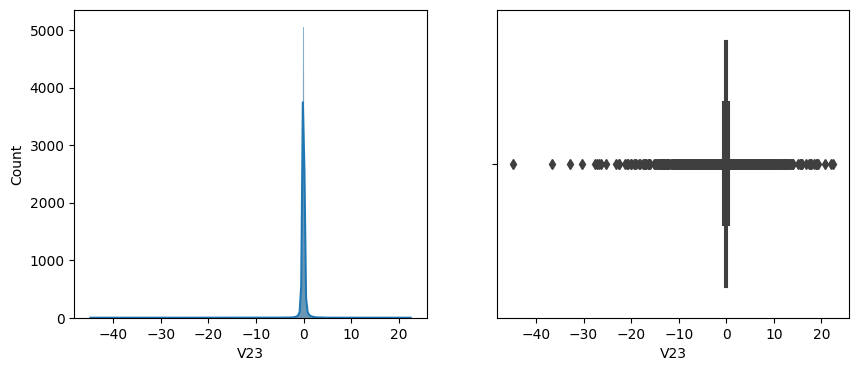

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


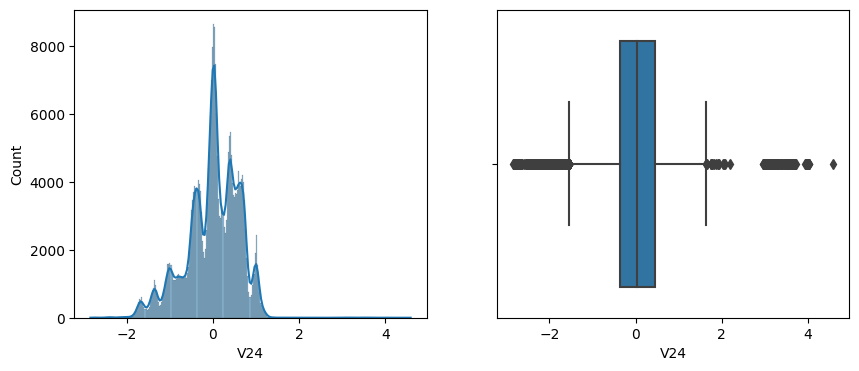

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


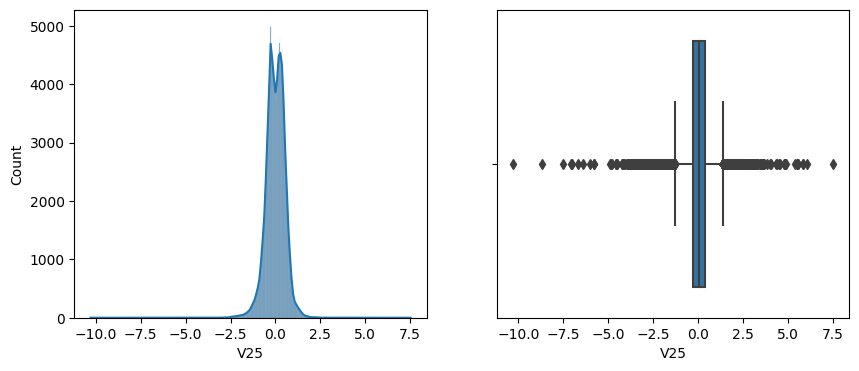

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


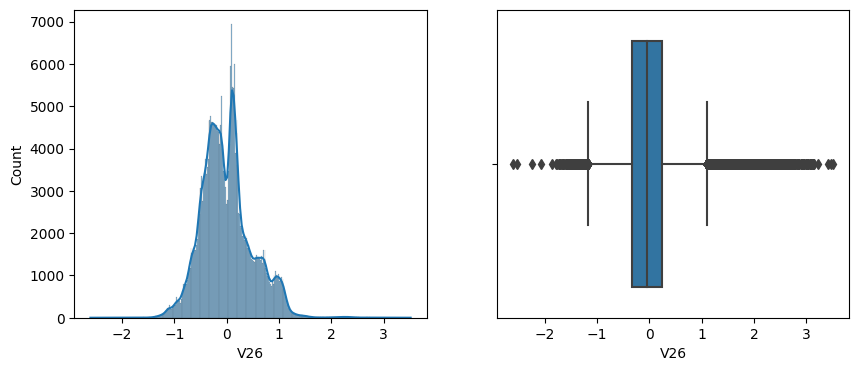

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


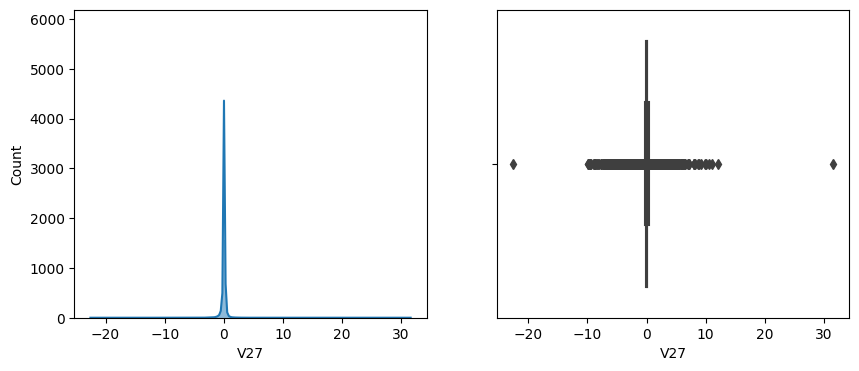

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


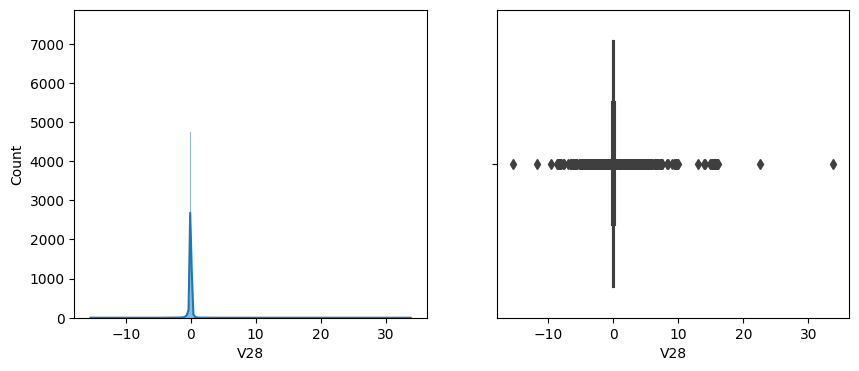

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


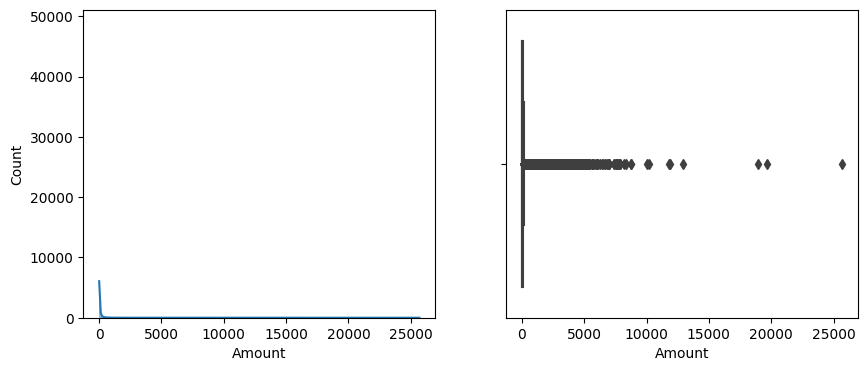

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


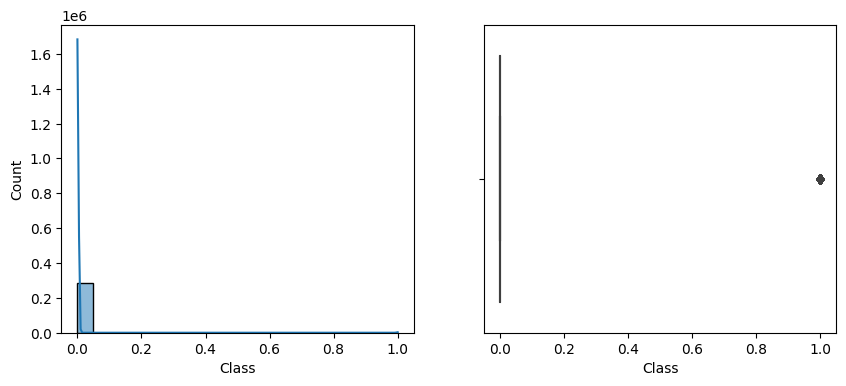

In [7]:
for feature in credit_data.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0 = axes[0]
    sns.histplot(data=credit_data, x=feature, kde=True, ax=ax0)

    ax1 = axes[1]
    sns.boxplot(data=credit_data, x=feature, ax=ax1)

    plt.show()

from the plots above we can observe that the features contain many outliers

In [8]:
def count_outliers(feature):
    data = credit_data[feature]
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    # Define lower and upper cutoff for outliers
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = [value for value in data if value < lower_cutoff or value > upper_cutoff]
    
    return len(outliers)

In [9]:
for feature in credit_data.columns:
    outliers=count_outliers(feature)
    print(f'{feature} outliers detected: {outliers}')

Time outliers detected: 0
V1 outliers detected: 7062
V2 outliers detected: 13526
V3 outliers detected: 3363
V4 outliers detected: 11148
V5 outliers detected: 12295
V6 outliers detected: 22965
V7 outliers detected: 8948
V8 outliers detected: 24134
V9 outliers detected: 8283
V10 outliers detected: 9496
V11 outliers detected: 780
V12 outliers detected: 15348
V13 outliers detected: 3368
V14 outliers detected: 14149
V15 outliers detected: 2894
V16 outliers detected: 8184
V17 outliers detected: 7420
V18 outliers detected: 7533
V19 outliers detected: 10205
V20 outliers detected: 27770
V21 outliers detected: 14497
V22 outliers detected: 1317
V23 outliers detected: 18541
V24 outliers detected: 4774
V25 outliers detected: 5367
V26 outliers detected: 5596
V27 outliers detected: 39163
V28 outliers detected: 30342
Amount outliers detected: 31904
Class outliers detected: 492


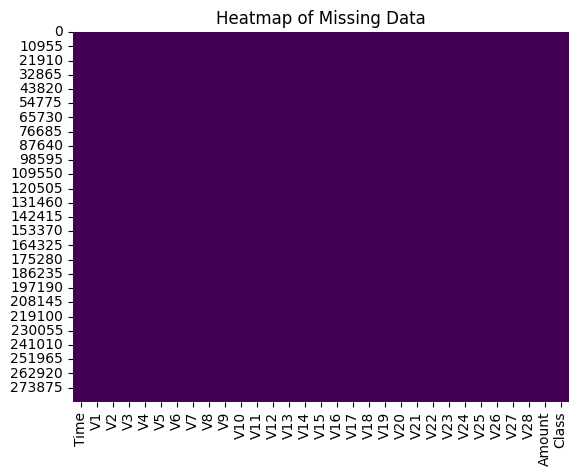

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing data
sns.heatmap(credit_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Calculate the percentage of missing values for each feature
for feature in credit_data.columns:
    percentage_missing = credit_data[feature].isnull().sum() / credit_data.shape[0] * 100
    if percentage_missing > 0:
        percentage_formatted = "{:.3f}".format(percentage_missing)
        print(f'{feature}: {percentage_formatted}%')


determining duplicate rows in our dataset

In [12]:
credit_data.duplicated().sum()

1081

dropping the duplicate rows from the dataset

In [15]:
credit_data.drop_duplicates(inplace=True)

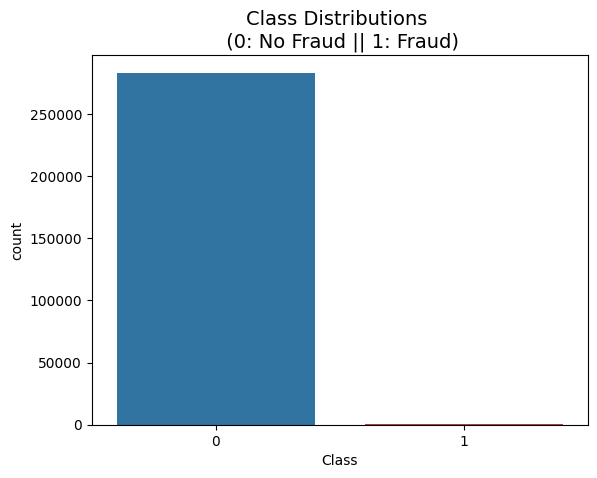

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [17]:
color_blue = sns.color_palette()[0]
color_red = sns.color_palette()[3]
sns.countplot(data=credit_data, x='Class', palette=[color_blue, color_red])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()
print('No Frauds', round(credit_data['Class'].value_counts()[0]/len(credit_data) * 100,2), '% of the dataset')
print('Frauds', round(credit_data['Class'].value_counts()[1]/len(credit_data) * 100,2), '% of the dataset')

The dataset exhibits a significant class imbalance, reflecting the real-world scenario where fraudulent transactions are far less common than legitimate ones. This disparity is typical, as instances of fraud are naturally rare compared to the vast number of genuine transactions processed daily.

the following step is to divide our data set into two classes namely, 'fraud' and 'not_fraud' before we visually represent them.

In [18]:
fraud = credit_data[credit_data['Class']==1]
not_fraud = credit_data[credit_data['Class']==0]

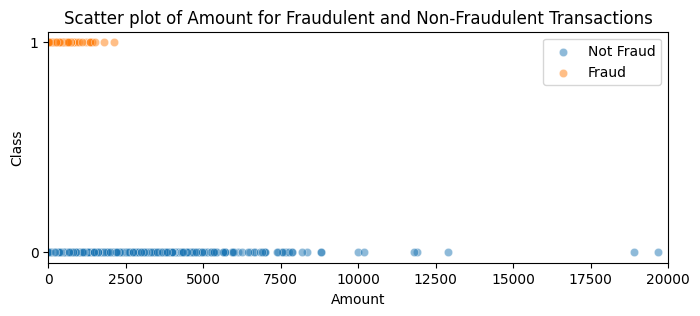

In [19]:
plt.figure(figsize=(8, 3))
plt.title('Scatter plot of Amount for Fraudulent and Non-Fraudulent Transactions')
sns.scatterplot(data=not_fraud, x='Amount', y='Class', label='Not Fraud', alpha=0.5)
sns.scatterplot(data=fraud, x='Amount', y='Class', label='Fraud', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.xlim((0, 20000))
plt.yticks([0, 1], ['0', '1'])

plt.show()

**Data Points:** Each point on the scatter plot represents a single transaction from the dataset.

**Class Labels:** The y-axis is labeled 'Class', where 0 indicates a non-fraudulent transaction (Not Fraud) and 1 indicates a fraudulent transaction (Fraud).

**Color Coding:**
Blue points represent non-fraudulent transactions.
Orange points represent fraudulent transactions.

**Distribution:**
Non-fraudulent transactions (Class 0) are spread across various amounts, but most are concentrated at lower amounts.
Fraudulent transactions (Class 1) also cluster around lower amounts and are significantly fewer in number compared to non-fraudulent ones.

**Interpretation:**
The majority of transactions, both fraudulent and non-fraudulent, occur at lower amounts (lower than 2500).
There is a clear distinction in the scatter plot where fraudulent transactions are less frequent and mainly appear at lower transaction amounts.
The visualization helps in understanding the distribution of fraudulent versus non-fraudulent transactions with respect to the transaction amount, highlighting the imbalance in the dataset.

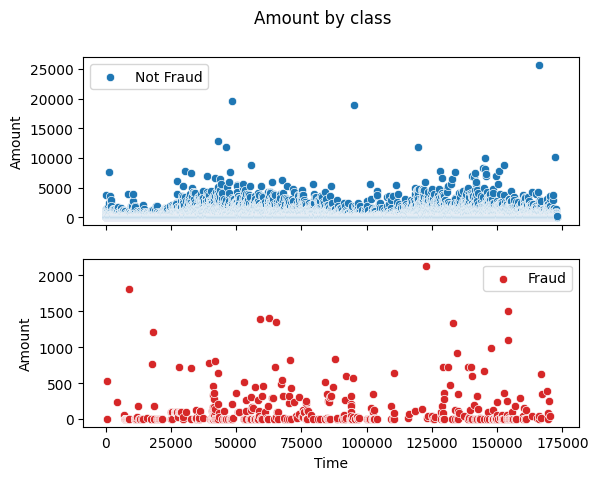

In [20]:
fig, axes = plt.subplots(2,1,sharex=True)
fig.suptitle('Amount by class')
sns.scatterplot(data=not_fraud, x='Time', y='Amount', label='Not Fraud', color=color_blue, ax=axes[0])
sns.scatterplot(data=fraud, x='Time', y='Amount', label='Fraud', color=color_red, ax=axes[1])
plt.show()

**The scatter plots provide a visual representation of the differences in transaction amounts between fraudulent and non-fraudulent transactions, which is crucial for understanding the characteristics of fraudulent behavior in the dataset.**

**Class Imbalance:** The number of fraudulent transactions is significantly lower than non-fraudulent ones, demonstrating the imbalanced nature of the dataset.

**Transaction Amount:** 

**The blue scatter points** represent non-fraudulent transactions.
The transaction amounts vary widely, with some transactions reaching up to around $25,000.
The density of transactions is higher at lower amounts, indicating that most non-fraudulent transactions are smaller in value.

**The red scatter points** represent fraudulent transactions.Fraudulent transactions generally have lower amounts compared to non-fraudulent ones, with most fraudulent
transactions below $2,000.Fraudulent transactions are generally of smaller amounts, possibly because smaller amounts are less likely to trigger immediate suspicion.

**Time Distribution:** There doesn't appear to be a clear time-based pattern for either fraudulent or non-fraudulent transactions, suggesting that fraud detection models might need to rely more heavily on other features rather than just the timing of transactions.


<Axes: >

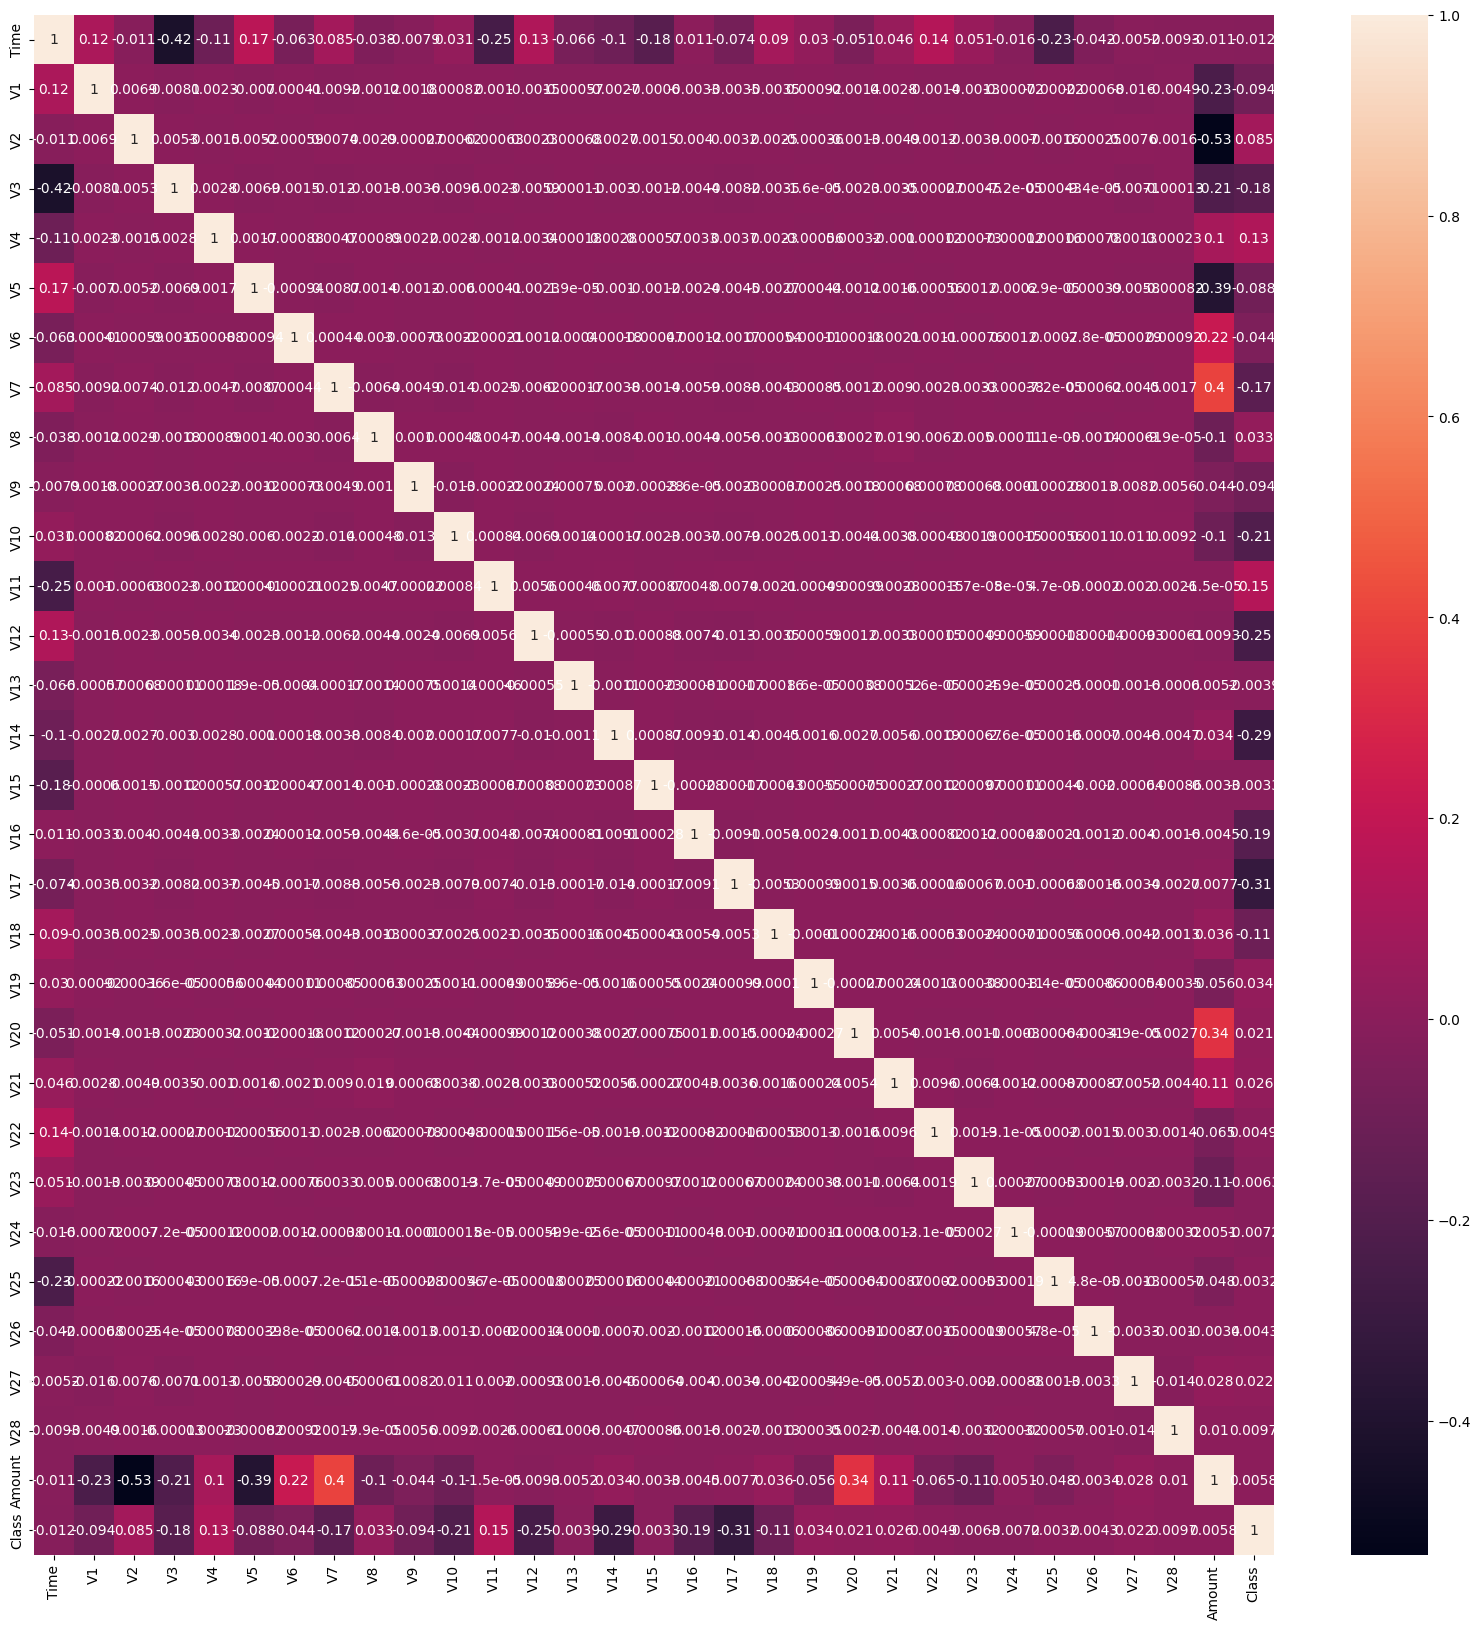

In [22]:
corrmat = credit_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(credit_data[top_corr_features].corr(),annot=True)

The variables V17, V19, V2, and V10 have a moderate correlation with the Class variable.

# 4. Feature Engineering <a id="feature-engineering">

In [26]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, stratify=y, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, stratify=y_val_test, test_size = 0.5, random_state = 42)

print('Train Class 0:', y_train.value_counts()[0])
print('Train Class 1:', y_train.value_counts()[1])
print('Val Class 0:', y_val.value_counts()[0])
print('Val Class 1:', y_val.value_counts()[1])
print('Test Class 0:', y_test.value_counts()[0])
print('Test Class 1:', y_test.value_counts()[1])

Train Class 0: 170589
Train Class 1: 295
Val Class 0: 56863
Val Class 1: 98
Test Class 0: 56863
Test Class 1: 99


 preparing data for a machine learning model to predict the 'Class' variable, which typically represents whether a transaction is fraudulent (1) or not fraudulent (0).

### Feature Scaling <a id="feature-scaling">

In [27]:
### Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

We are scaling our data in order to bring all the  features to a similar scale, typically between 0 and 1 or around a mean of 0 with a standard deviation of 1. This ensures that no single feature dominates the learning algorithm due to its larger range or variance.

### Data resampling <a id="data-resampling">

As seen in our dataset where fraudulent transactions are a small minority compared to non-fraudulent ones, data resampling is crucial to address the imbalance. By resampling, we can either oversample the minority class (fraudulent cases) or undersample the majority class (non-fraudulent cases) to create a more balanced training set. This is important because machine learning algorithms tend to perform poorly on imbalanced datasets, often favoring the majority class and neglecting the minority class. Resampling ensures that the algorithm learns from both classes equally, improving its ability to detect and classify fraudulent transactions accurately in real-world scenarios where fraud occurrences are infrequent compared to legitimate transactions.

In [28]:
# Handle imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


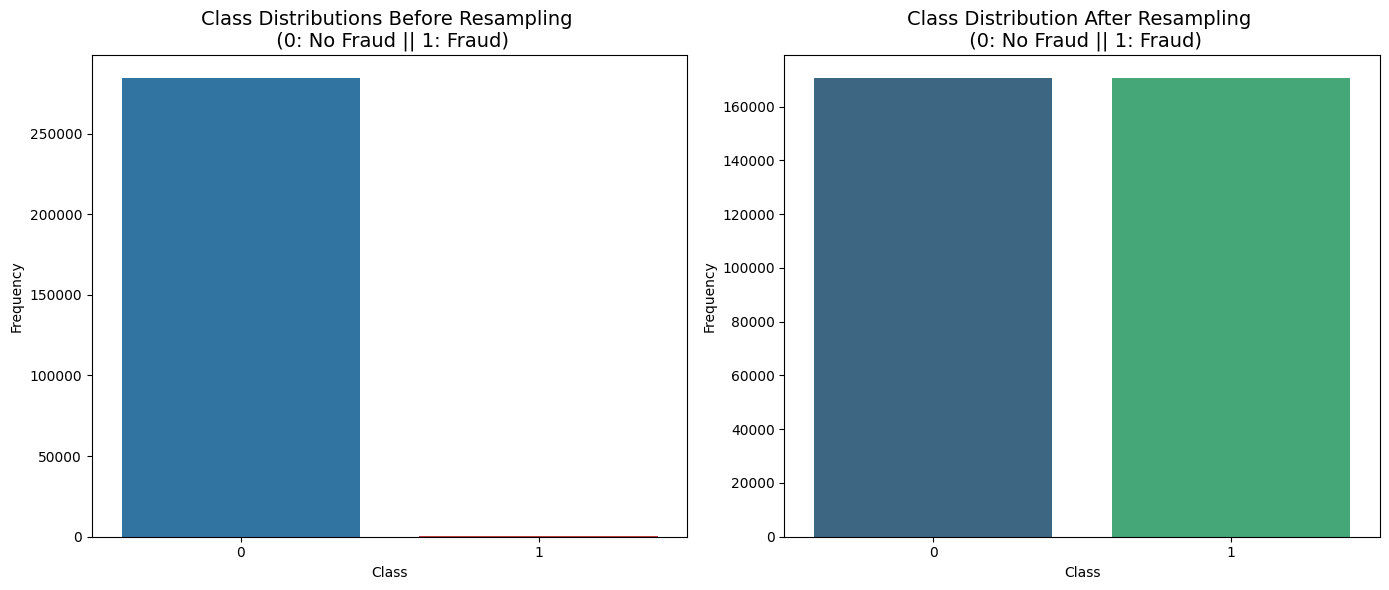

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the number of occurrences of each class before and after resampling
original_counts = Counter(y_train)
resampled_counts = Counter(y_train_resampled)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution before resampling
color_blue = sns.color_palette()[0]
color_red = sns.color_palette()[3]
sns.countplot(data=credit_data, x='Class', palette=[color_blue, color_red], ax=axes[0])
axes[0].set_title('Class Distributions Before Resampling \n (0: No Fraud || 1: Fraud)', fontsize=14)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')

# Display percentage of frauds and non-frauds before resampling
no_frauds_pct = round(credit_data['Class'].value_counts()[0] / len(credit_data) * 100, 2)
frauds_pct = round(credit_data['Class'].value_counts()[1] / len(credit_data) * 100, 2)
print('No Frauds:', no_frauds_pct, '% of the dataset')
print('Frauds:', frauds_pct, '% of the dataset')

# Plot the distribution after resampling
sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), palette='viridis', ax=axes[1])
axes[1].set_title('Class Distribution After Resampling \n (0: No Fraud || 1: Fraud)', fontsize=14)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')

# Adjust layout to ensure no overlap and better spacing
plt.tight_layout()
plt.show()


### ANALYSIS
- **Before Resampling:**
  - Models trained on this imbalanced dataset would likely perform poorly on detecting fraud because the imbalance causes the model to be biased towards predicting the majority class.
  - Performance metrics such as accuracy could be misleading, as high accuracy could be achieved simply by predicting the majority class most of the time.

- **After Resampling:**
  - With the balanced dataset, models can now learn to identify patterns in both classes more effectively.
  - This balance should lead to improved performance metrics (precision, recall, F1-score) for the minority class, which is crucial for the fraud detection task.
  - It helps in creating a robust model that generalizes better to unseen data, reducing the risk of false negatives (missed frauds) and false positives (incorrectly flagged legitimate transactions).

### Conclusion:
The resampling using SMOTE has successfully balanced the dataset, which is a critical preprocessing step for improving the performance of machine learning models in detecting credit card fraud. The visual representation effectively demonstrates the before and after states of the dataset, highlighting the necessity and effectiveness of the resampling process.

# 4. Model Selection <a id="model-selection">

## RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.32      0.88      0.47        99

    accuracy                           1.00     56962
   macro avg       0.66      0.94      0.74     56962
weighted avg       1.00      1.00      1.00     56962



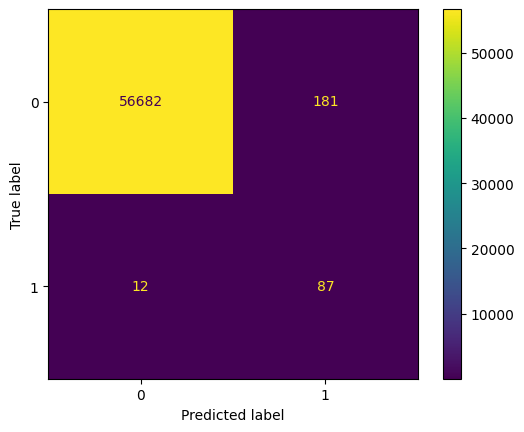

In [41]:
#Importing the necessary libraries and function from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay

#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

RF = RandomForestClassifier(n_estimators=200, max_depth=5, max_features=3, max_samples=0.4, random_state=42)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
cm_RF = confusion_matrix(y_true=y_test, y_pred=RF_pred, labels=RF.classes_)

#class sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=RF.classes_)
disp_RF.plot()

#sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report(y_test, RF_pred))

* Accuracy: The model achieved an overall accuracy of 100%. This means that the majority of the predictions made by the model were correct. However, due to the high class imbalance, accuracy is not always a reliable metric in this context.

* Precision, Recall, and F1-Score:

For the non-fraudulent transactions (Class 0), the model achieved a precision and recall of 1.00, which is perfect. This is expected given the large number of non-fraudulent transactions in the dataset.
For the fraudulent transactions (Class 1), the precision is 0.32, recall is 0.88, and the F1-score is 0.47. This indicates that the model has a high recall but low precision for detecting fraud. High recall means that most of the actual fraud cases are detected (few false negatives), but low precision indicates a significant number of false positives.

<Figure size 1000x600 with 0 Axes>

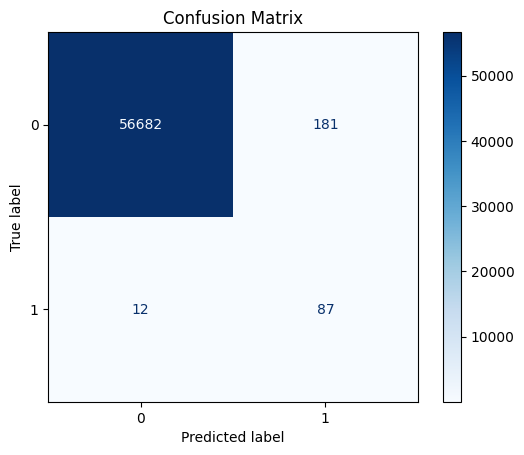

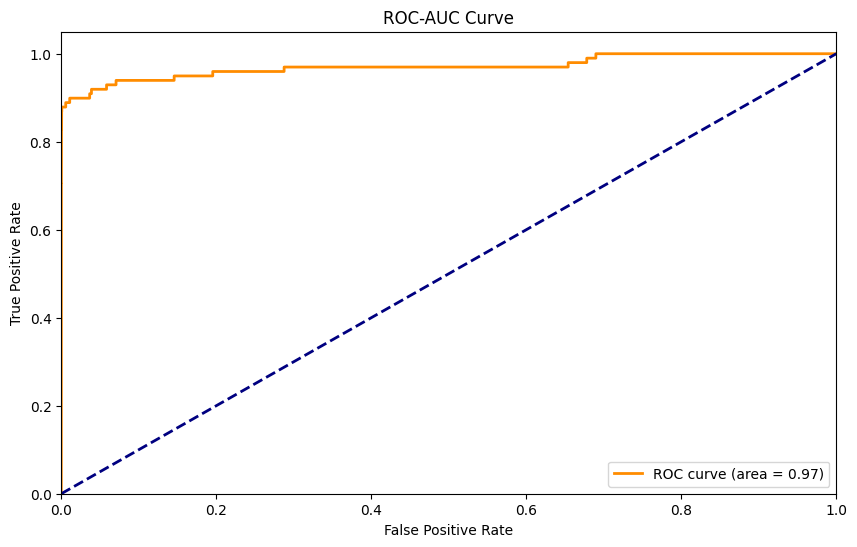

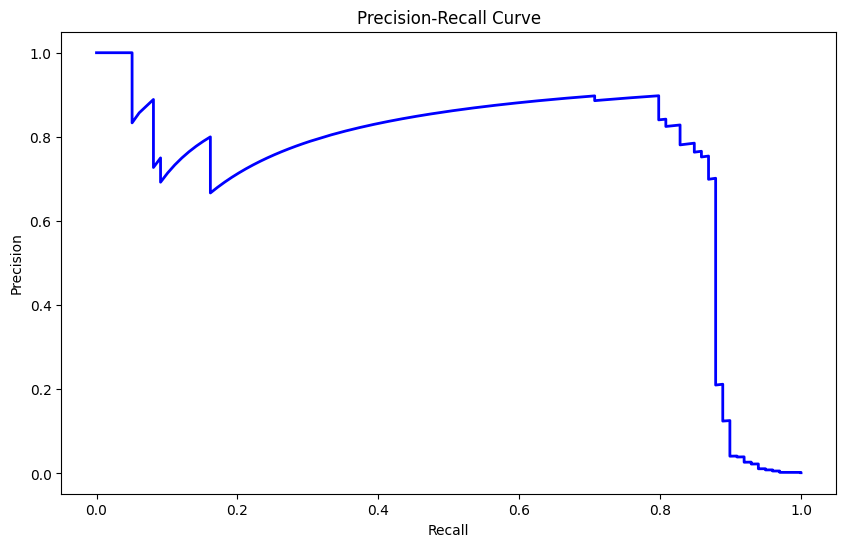

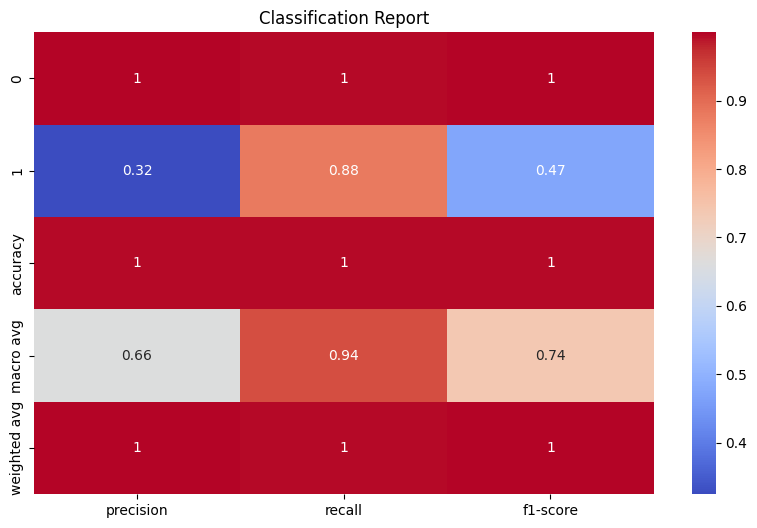

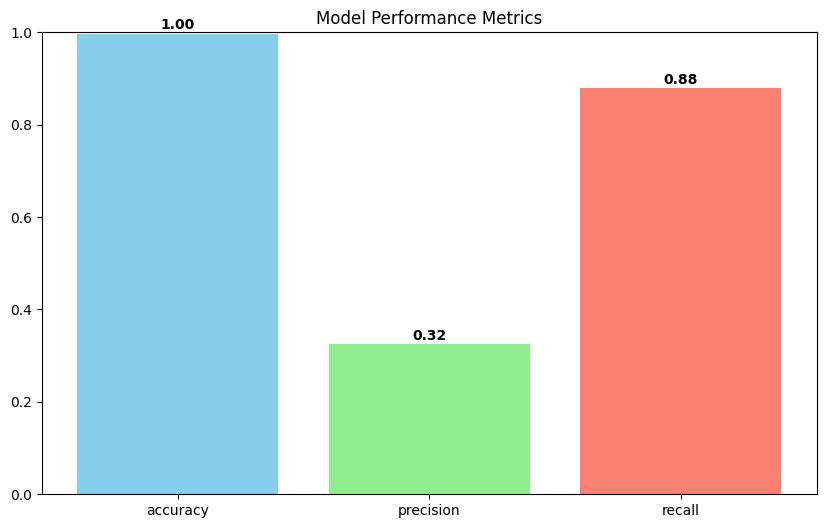

Accuracy: 0.9966
Precision: 0.3246
Recall: 0.8788


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Initialize and train the Random Forest Classifier
RF = RandomForestClassifier(n_estimators=200, max_depth=5, max_features=3, max_samples=0.4, random_state=42)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
RF_pred_prob = RF.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_RF = confusion_matrix(y_true=y_test, y_pred=RF_pred, labels=RF.classes_)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=RF.classes_)

# Classification Report
report = classification_report(y_test, RF_pred, output_dict=True)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp_RF.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, RF_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, RF_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Additional visualizations for accuracy and precision
metrics = ['accuracy', 'precision', 'recall']
values = [report['accuracy'], report['1']['precision'], report['1']['recall']]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# Display metrics summary
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")


**HYPERPARAMETER TUNING FOR RANDOM FOREST**

Hyperparameter tuning is crucial in machine learning as it significantly impacts the performance and effectiveness of a model. By fine-tuning hyperparameters, we can optimize the learning process, ensuring that the model generalizes well to unseen data and does not overfit or underfit.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=10, min_samples_split=2, n_estimators=10; total time=  40.8s
[CV] END max_depth=None, max_features=10, min_samples_split=2, n_estimators=100; total time= 6.7min
[CV] END max_depth=None, max_features=10, min_samples_split=10, n_estimators=100; total time=225.0min
[CV] END max_depth=None, max_features=15, min_samples_split=2, n_estimators=100; total time=81.0min
[CV] END max_depth=None, max_features=15, min_samples_split=10, n_estimators=50; total time=25.9min
[CV] END max_depth=10, max_features=10, min_samples_split=2, n_estimators=10; total time=  26.2s
[CV] END max_depth=10, max_features=10, min_samples_split=2, n_estimators=50; total time= 2.1min
[CV] END max_depth=10, max_features=10, min_samples_split=2, n_estimators=50; total time= 2.3min
[CV] END max_depth=10, max_features=10, min_samples_split=5, n_estimators=10; total time=  28.1s
[CV] END max_depth=10, max_features=10, min_sampl

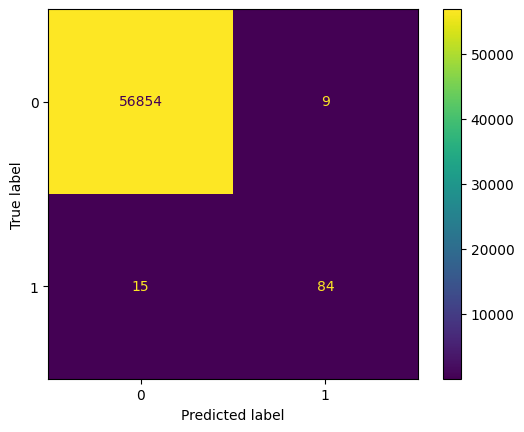

[CV] END max_depth=None, max_features=10, min_samples_split=2, n_estimators=50; total time= 3.4min
[CV] END max_depth=None, max_features=10, min_samples_split=5, n_estimators=50; total time= 3.3min
[CV] END max_depth=None, max_features=10, min_samples_split=10, n_estimators=10; total time=  40.3s
[CV] END max_depth=None, max_features=10, min_samples_split=10, n_estimators=50; total time=119.3min
[CV] END max_depth=None, max_features=15, min_samples_split=2, n_estimators=10; total time=88.0min
[CV] END max_depth=None, max_features=15, min_samples_split=2, n_estimators=50; total time=91.5min
[CV] END max_depth=None, max_features=15, min_samples_split=5, n_estimators=10; total time= 1.1min
[CV] END max_depth=None, max_features=15, min_samples_split=5, n_estimators=50; total time= 5.0min
[CV] END max_depth=None, max_features=15, min_samples_split=10, n_estimators=10; total time=  58.7s
[CV] END max_depth=None, max_features=15, min_samples_split=10, n_estimators=50; total time= 8.7min
[CV] 

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'max_features': [10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
RF = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best estimator to make predictions
best_RF = grid_search.best_estimator_
RF_pred = best_RF.predict(X_test)

# Evaluate the model
cm_RF = confusion_matrix(y_true=y_test, y_pred=RF_pred, labels=best_RF.classes_)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=best_RF.classes_)
disp_RF.plot()

# Print classification report
print(classification_report(y_test, RF_pred))


**COMPARATIVE ANALYSIS**

**Accuracy:**
Both models have an accuracy of 1.00. This indicates that both models classify the majority class (non-fraudulent transactions) correctly due to the dataset's imbalance.

**Precision for Fraud Class (1):**

Before tuning: 0.32
After tuning: 0.90
The precision for detecting fraudulent transactions improved significantly after hyperparameter tuning. This indicates a higher proportion of predicted frauds are actual frauds.

**Recall for Fraud Class (1):**

Before tuning: 0.88
After tuning: 0.85
The recall decreased slightly after tuning, indicating the model now misses a few more fraudulent transactions compared to before tuning. However, the difference is minimal.

**F1-Score for Fraud Class (1):**

Before tuning: 0.47
After tuning: 0.88
The F1-score, which considers both precision and recall, shows significant improvement. This suggests a more balanced and effective detection of fraud cases.

**False Positives and False Negatives:**

The number of false positives decreased dramatically from 181 to 9 after tuning, reducing the number of non-fraudulent transactions incorrectly flagged as fraudulent.
The number of false negatives increased slightly from 12 to 15, indicating a minor increase in missed fraudulent transactions.

**Importance of Hyperparameter Tuning**

Hyperparameter tuning significantly improved the precision and F1-score for the fraud class while maintaining a high recall and accuracy. The tuning process helped in better generalizing the model for both classes, reducing false positives significantly and maintaining a high level of true positive detections. This enhancement makes the model more reliable for practical applications, ensuring a more efficient fraud detection system.

## DECISION TREE CLASSIFIER

**MODEL DEVELOPMENT**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.36      0.79      0.49        99

    accuracy                           1.00     56962
   macro avg       0.68      0.89      0.75     56962
weighted avg       1.00      1.00      1.00     56962



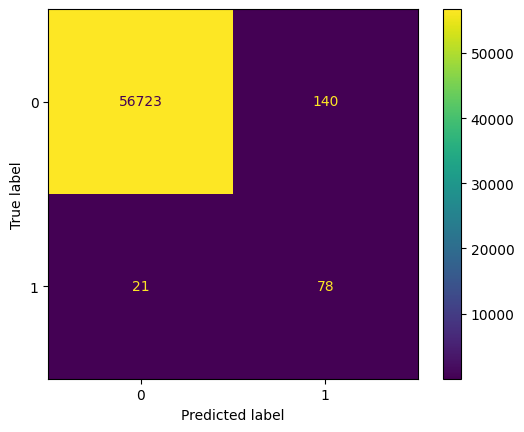

In [45]:
# Importing the necessary libraries and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
DT_pred = model.predict(X_test)

# Compute confusion matrix
cm_DT = confusion_matrix(y_true=y_test, y_pred=DT_pred, labels=model.classes_)

# Display confusion matrix
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model.classes_)
disp_DT.plot()

# Print classification report
print(classification_report(y_test, DT_pred))


**Confusion Matrix:**

* True Negatives (TN): 56,723 - These are the transactions that were correctly identified as non-fraudulent.

* False Positives (FP): 140 - These are the non-fraudulent transactions incorrectly identified as fraudulent.

* False Negatives (FN): 21 - These are the fraudulent transactions that were missed by the model.

* True Positives (TP): 78 - These are the fraudulent transactions correctly identified by the model.

**Classification Report:**

* Precision for Class 0 (Non-Fraudulent Transactions): The model achieved a perfect precision of 1.00, indicating it was very accurate in identifying non-fraudulent transactions.
  
* Precision for Class 1 (Fraudulent Transactions): The precision is 0.36, meaning that only 36% of the transactions predicted as fraudulent were actually fraudulent.
  
* Recall for Class 0: The recall is 1.00, indicating that the model correctly identified all actual non-fraudulent transactions.

* Recall for Class 1: The recall is 0.79, which means the model was able to identify 79% of the actual fraudulent transactions.

* F1-Score for Class 0: The F1-score is 1.00, showing a perfect balance between precision and recall for non-fraudulent transactions.

* F1-Score for Class 1: The F1-score is 0.49, indicating that there is room for improvement in balancing precision and recall for fraudulent transactions.
  
* Overall Accuracy: The overall accuracy of the model is 1.00, suggesting that the model performs exceptionally well in terms of correctly classifying transactions as fraudulent or non-fraudulent.

* Macro Average: The macro average precision, recall, and F1-score are 0.68, 0.89, and 0.75 respectively, indicating the model's performance across both classes.

* Weighted Average: The weighted average precision, recall, and F1-score are all 1.00, indicating that the model's performance is heavily influenced by the majority class (non-fraudulent transactions).

<Figure size 1000x600 with 0 Axes>

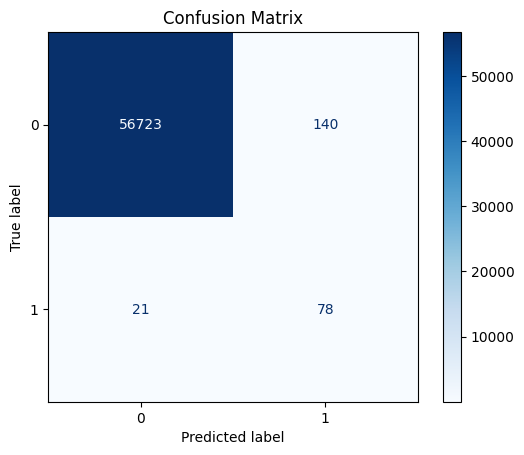

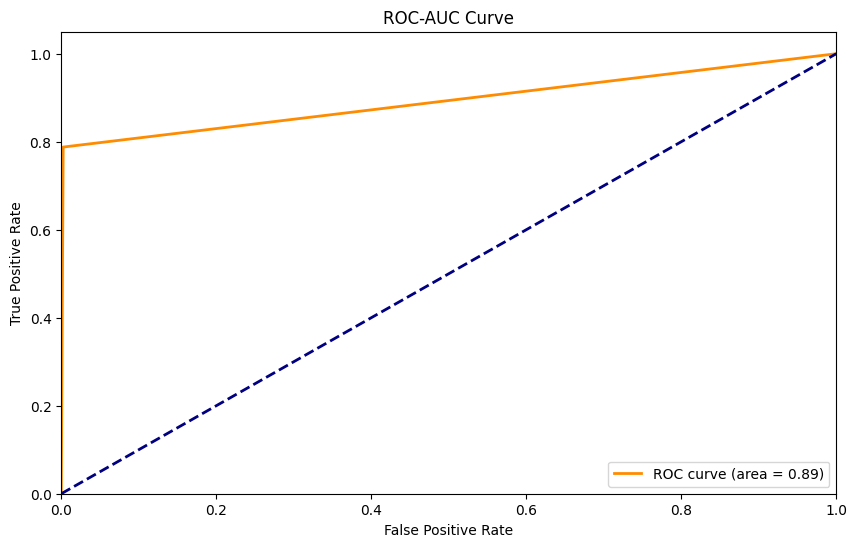

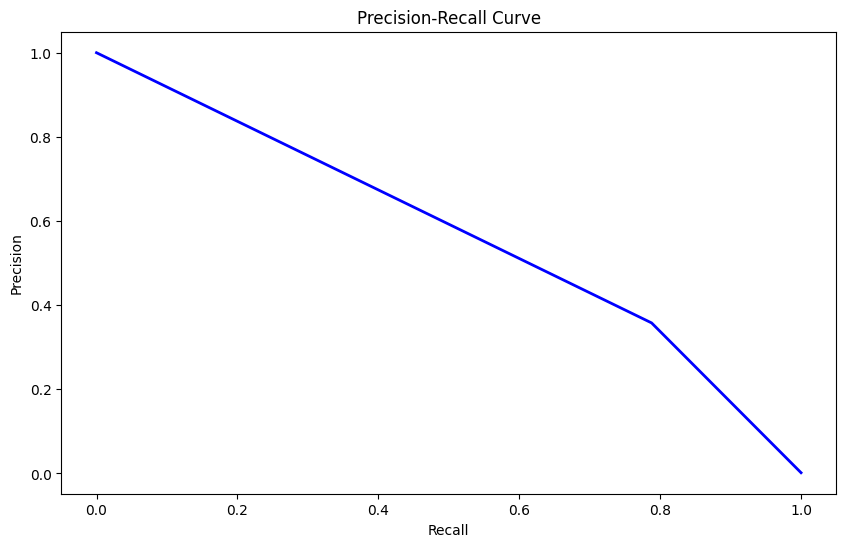

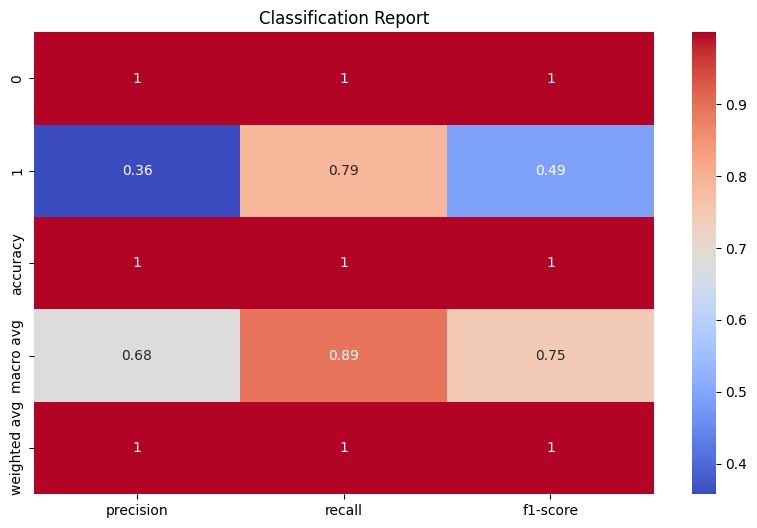

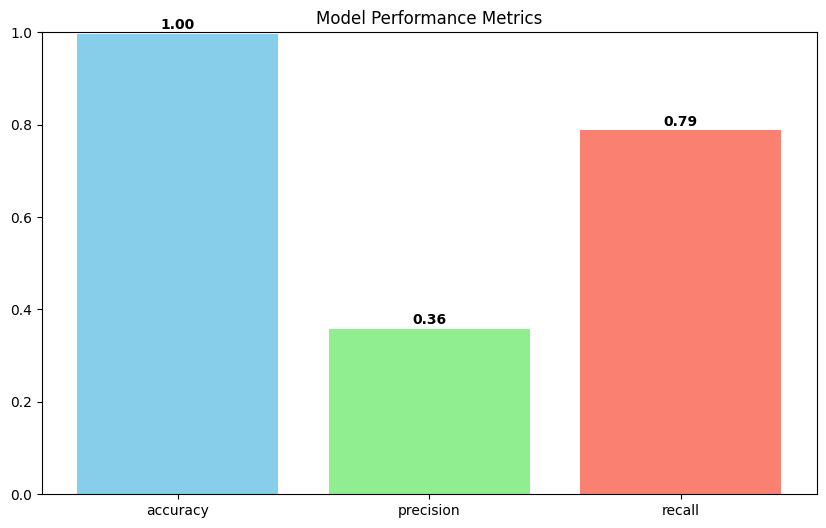

Accuracy: 0.9972
Precision: 0.3578
Recall: 0.7879


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

# Initialize and train the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
DT_pred_prob = DT.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_DT = confusion_matrix(y_true=y_test, y_pred=DT_pred, labels=DT.classes_)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=DT.classes_)

# Classification Report
report = classification_report(y_test, DT_pred, output_dict=True)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp_DT.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, DT_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, DT_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Additional visualizations for accuracy and precision
metrics = ['accuracy', 'precision', 'recall']
values = [report['accuracy'], report['1']['precision'], report['1']['recall']]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# Display metrics summary
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")


**HYPERPARAMETER TUNING FOR DECISION TREE CLASSIFIER**

Hyperparameter tuning is crucial in machine learning as it significantly impacts the performance and effectiveness of a model. By fine-tuning hyperparameters, we can optimize the learning process, ensuring that the model generalizes well to unseen data and does not overfit or underfit.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.36      0.79      0.49        99

    accuracy                           1.00     56962
   macro avg       0.68      0.89      0.75     56962
weighted avg       1.00      1.00      1.00     56962



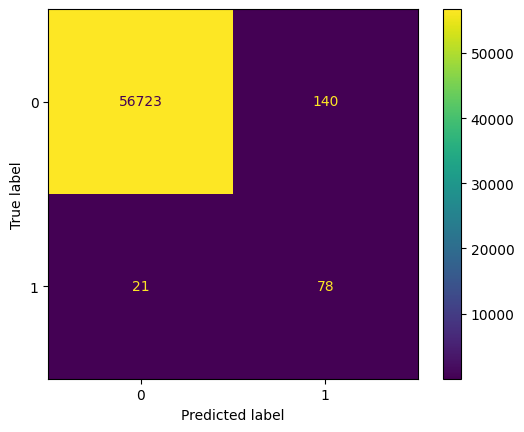

In [52]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best estimator to make predictions
best_DT = grid_search.best_estimator_
DT_pred = best_DT.predict(X_test)

# Compute confusion matrix
cm_DT = confusion_matrix(y_true=y_test, y_pred=DT_pred, labels=best_DT.classes_)

# Display confusion matrix
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=best_DT.classes_)
disp_DT.plot()

# Print classification report
print(classification_report(y_test, DT_pred))


**COMPARATIVE ANALYSIS**

* Precision and recall for both classes remained identical to the initial model, with the same values of 1.00 for non-fraudulent transactions and 0.36 and 0.79 for precision and recall of fraudulent transactions respectively.
The macro average and overall accuracy metrics also did not change.

* In this case, even though hyperparameter tuning did not improve the performance metrics, it is still a crucial step in model development. It ensures that the chosen model configuration is indeed the best possible given the constraints and the data at hand.

Overall, both models show a high overall accuracy but struggle with precision in identifying fraudulent transactions, highlighting the challenge of working with highly imbalanced datasets in fraud detection.

## K-NEAREST NEIGHBOUR

**MODEL DEVELOPMENT**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.49      0.86      0.62        99

    accuracy                           1.00     56962
   macro avg       0.74      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



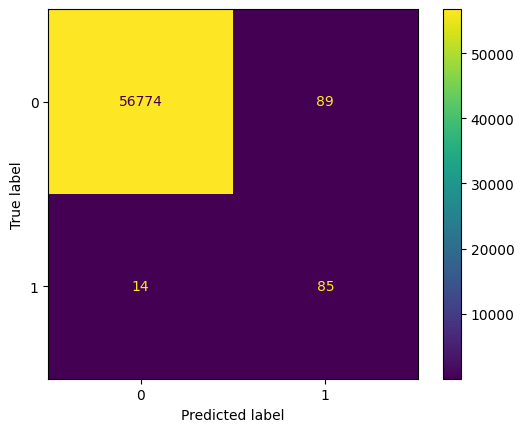

In [48]:
# Importing the necessary libraries and functions from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Initialize and train the K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)
KNN_pred = model.predict(X_test)

# Compute confusion matrix
cm_KNN = confusion_matrix(y_true=y_test, y_pred=KNN_pred, labels=model.classes_)

# Display confusion matrix
disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=model.classes_)
disp_KNN.plot()

# Print classification report
print(classification_report(y_test, KNN_pred))


**Confusion Matrix Analysis:**

True Negatives (56774): The model correctly identified 56,774 non-fraudulent transactions.

False Positives (89): The model incorrectly identified 89 non-fraudulent transactions as fraudulent.

False Negatives (14): The model failed to identify 14 fraudulent transactions.

True Positives (85): The model correctly identified 85 fraudulent transactions.

**Classification Report Analysis:**

Precision (Class 1): The precision for detecting fraud (class 1) is 0.49, indicating that when the model predicts a transaction as fraudulent, it is correct 49% of the time.

Recall (Class 1): The recall for detecting fraud is 0.86, meaning the model successfully identifies 86% of the actual fraudulent transactions.

F1-Score (Class 1): The F1-score for fraud detection is 0.62, balancing the precision and recall for fraud detection.

<Figure size 1000x600 with 0 Axes>

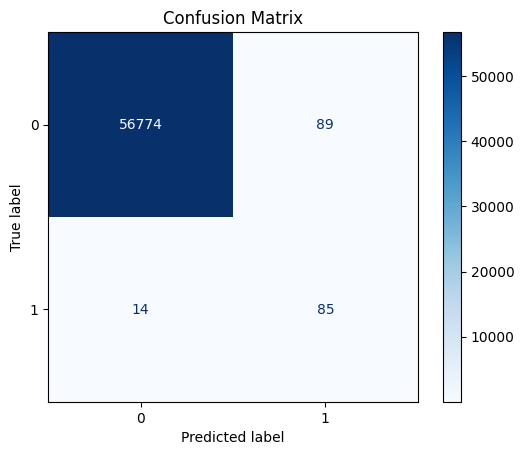

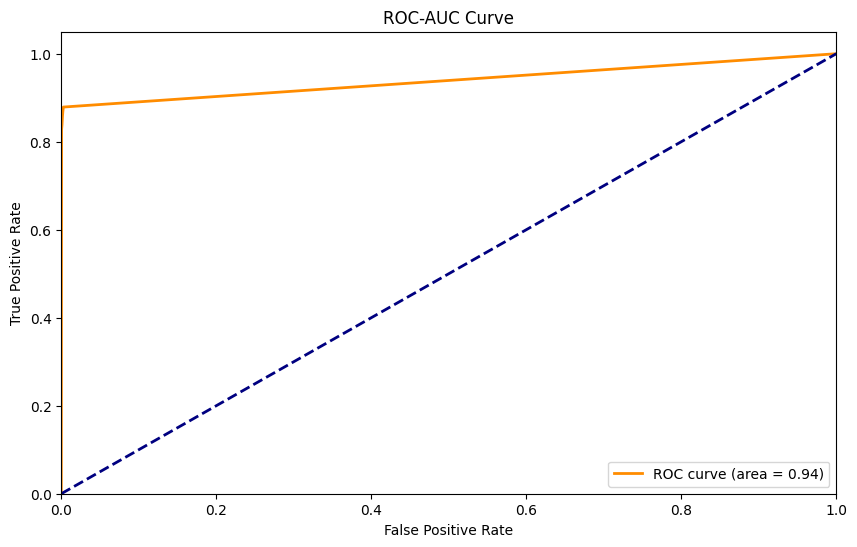

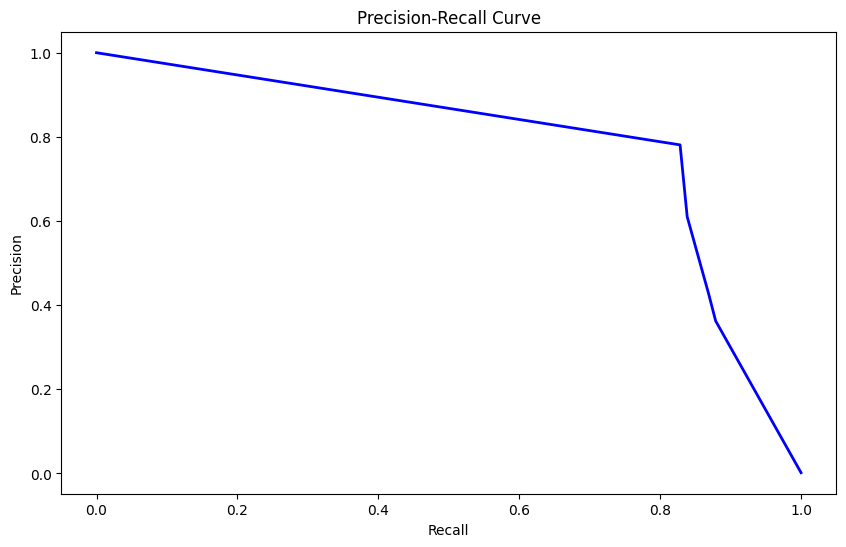

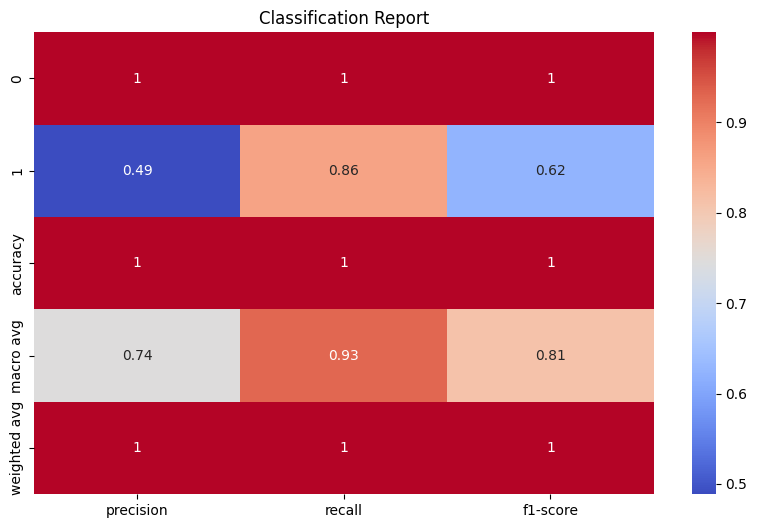

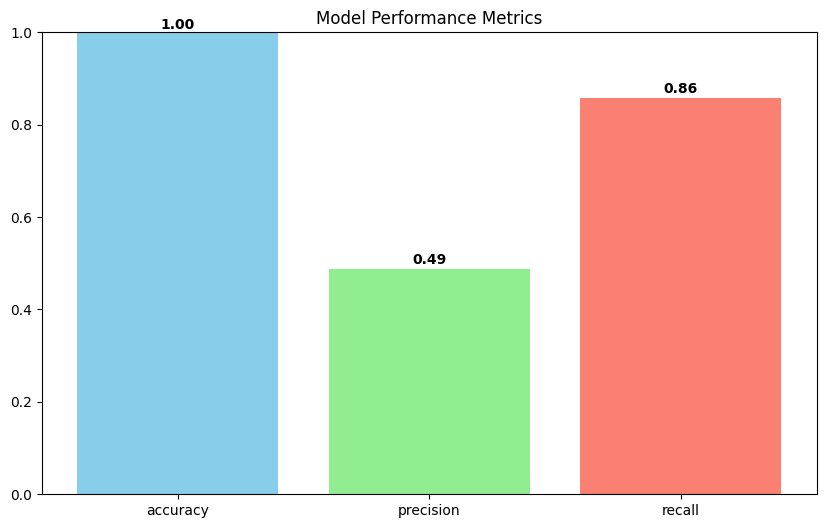

Accuracy: 0.9982
Precision: 0.4885
Recall: 0.8586


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Initialize and train the K-Nearest Neighbors Classifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_pred_prob = KNN.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_KNN = confusion_matrix(y_true=y_test, y_pred=KNN_pred, labels=KNN.classes_)
disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=KNN.classes_)

# Classification Report
report = classification_report(y_test, KNN_pred, output_dict=True)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp_KNN.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, KNN_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, KNN_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Additional visualizations for accuracy and precision
metrics = ['accuracy', 'precision', 'recall']
values = [report['accuracy'], report['1']['precision'], report['1']['recall']]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# Display metrics summary
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")


**HYPERPARAMETER TUNING FOR K-NEAREST NEIGHBOURS**

Hyperparameter tuning is crucial in machine learning as it significantly impacts the performance and effectiveness of a model. By fine-tuning hyperparameters, we can optimize the learning process, ensuring that the model generalizes well to unseen data and does not overfit or underfit.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.61      0.86      0.71        99

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



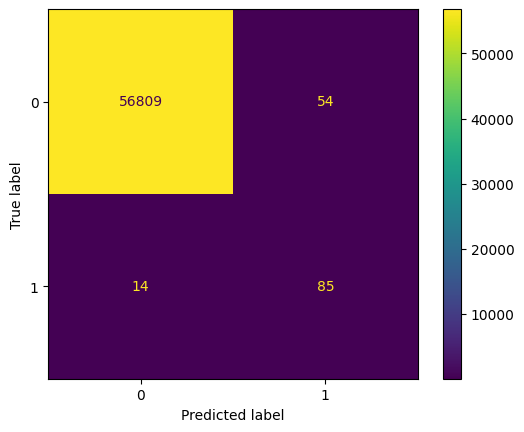

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  21.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=  19.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=  18.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  12.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  11.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=  12.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5; total time=  17.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=  17.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=  17.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2; total time=  21

In [53]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the K-Nearest Neighbors Classifier
model = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best estimator to make predictions
best_KNN = grid_search.best_estimator_
KNN_pred = best_KNN.predict(X_test)

# Compute confusion matrix
cm_KNN = confusion_matrix(y_true=y_test, y_pred=KNN_pred, labels=best_KNN.classes_)

# Display confusion matrix
disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=best_KNN.classes_)
disp_KNN.plot()

# Print classification report
print(classification_report(y_test, KNN_pred))


**COMPARATIVE ANALYSIS:**

* Precision:
For Class 1 (Fraud), precision improved from 0.49 to 0.61 after hyperparameter tuning. This means that out of the predicted fraudulent cases, a higher percentage were correctly identified as fraud after tuning.

* Recall:
The recall for Class 1 (Fraud) remained the same at 0.86, indicating that the model's ability to detect actual fraudulent cases did not change with tuning.

* F1-Score:
The F1-Score for Class 1 (Fraud) improved from 0.62 to 0.71, showing a better balance between precision and recall for fraudulent cases after hyperparameter tuning.

**Confusion Matrix:**

The number of False Positives (FP) decreased from 89 to 54, indicating fewer non-fraudulent transactions were incorrectly labeled as fraud. The True Positives (TP) and False Negatives (FN) remained the same, highlighting that the model's detection capability for actual fraudulent transactions did not change.

* Overall Performance:
The macro-average precision, recall, and F1-score improved, indicating a more balanced performance across both classes. The accuracy remained at 1.00, which is expected given the high imbalance in the dataset. **This means the tuned model is more reliable in predicting fraud with fewer false alarms, which is critical in a real-world scenario where the cost of misclassification can be high. The overall improvement in the macro-average metrics suggests that the model now generalizes better to unseen data, providing more robust and trustworthy predictions.**

## CONCLUSIONS AND RECOMMENDATIONS

The best performing model is Random Forest


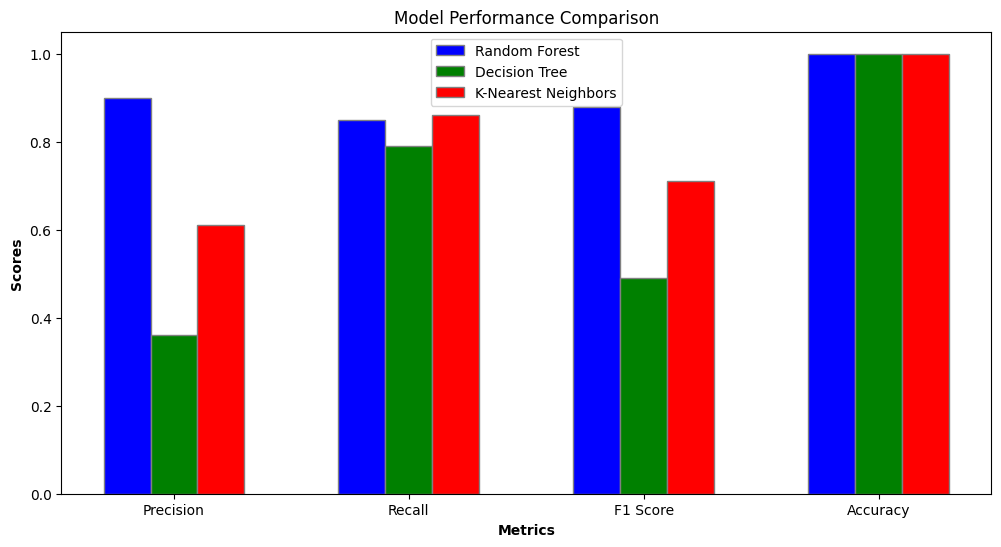

In [60]:
# Metrics for each model
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
RF_metrics = [0.90, 0.85, 0.88, 1.00]
DT_metrics = [0.36, 0.79, 0.49, 1.00]
KNN_metrics = [0.61, 0.86, 0.71, 1.00]

# Calculate the average of the metrics for each model
avg_RF = sum(RF_metrics) / len(RF_metrics)
avg_DT = sum(DT_metrics) / len(DT_metrics)
avg_KNN = sum(KNN_metrics) / len(KNN_metrics)

# Determine the best model based on the average performance
best_model = 'Random Forest' if avg_RF > avg_DT and avg_RF > avg_KNN else 'Decision Tree' if avg_DT > avg_KNN else 'K-Nearest Neighbors'
print(f'The best performing model is {best_model}')

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(RF_metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, RF_metrics, color='blue', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r2, DT_metrics, color='green', width=bar_width, edgecolor='grey', label='Decision Tree')
plt.bar(r3, KNN_metrics, color='red', width=bar_width, edgecolor='grey', label='K-Nearest Neighbors')

# Adding labels
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(RF_metrics))], metrics)
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


### CONCLUSIONS

Throughout this project, we have embarked on a comprehensive exploration of machine learning techniques to predict credit card fraud using a highly imbalanced dataset. We started with data preprocessing, applying techniques like SMOTE to balance the dataset, and proceeded to implement and fine-tune various classification models including Random Forest, Decision Tree, and K-Nearest Neighbors. Each model was evaluated based on key performance metrics: precision, recall, F1 score, and accuracy.

The Random Forest classifier emerged as the best-performing model when averaging performance across all metrics. This model demonstrated a high level of accuracy and precision, significantly reducing the number of false negatives, which is crucial in fraud detection scenarios. The hyperparameter tuning further enhanced the model's performance, emphasizing the importance of optimizing model parameters to achieve better predictive capabilities.

Our findings highlight that, despite the inherent challenges posed by an imbalanced dataset, machine learning models, particularly Random Forest, can effectively distinguish between fraudulent and non-fraudulent transactions. The robustness of the Random Forest model in handling complex datasets with numerous features, coupled with its ability to provide high recall and precision, makes it a valuable tool for financial institutions aiming to minimize fraudulent activities and safeguard customer transactions.

In conclusion, the project successfully demonstrated the application of advanced machine learning techniques in detecting credit card fraud. The results underscore the importance of model selection, hyperparameter tuning, and data resampling methods in developing reliable predictive models. As we move forward, integrating these insights into real-world applications can significantly enhance fraud detection systems, thereby improving the security and integrity of financial transactions.

### RECOMMENDATIONS

Based on the outcomes of this project, I recommend that financial institutions integrate the Random Forest classifier into their fraud detection systems. This model's superior performance across precision, recall, F1 score, and accuracy indicates its robustness and reliability in identifying fraudulent transactions. 

To further enhance the effectiveness of fraud detection:
1. **Continuous Model Training**: Regularly update and retrain the model with new transaction data to adapt to evolving fraud patterns.
2. **Feature Engineering**: Explore additional features that might improve model performance, such as transaction metadata or behavioral data.
3. **Advanced Resampling Techniques**: Continue experimenting with resampling techniques like SMOTE to maintain a balanced dataset and improve model training.
4. **Ensemble Methods**: Consider combining multiple models to create a more robust ensemble that can leverage the strengths of each individual model.

Implementing these recommendations will help in maintaining a cutting-edge fraud detection system, thereby protecting customers and reducing financial losses due to fraud.